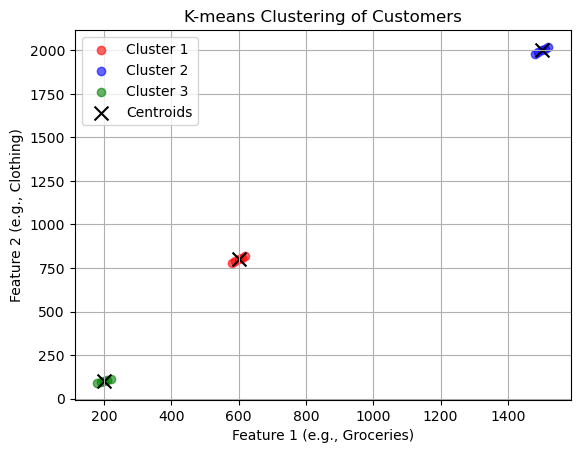

In [2]:
# Importing libraries needed
import numpy as np
import matplotlib.pyplot as plt

# It Enable inline plotting
%matplotlib inline

#Step 1: Create sample data
#Imagine we're working with data that shows how much people spend each year in different categories, such as groceries, clothing, and electronics.

#Assuming spending patterns
#For simplicity, let's assume this data reflects annual spending habits across these three categories.


np.random.seed(42)
data = np.array([
    [200, 100, 50], [220, 110, 55], [180, 90, 45], [190, 95, 50], [210, 105, 52],
    [600, 800, 500], [620, 820, 510], [580, 780, 490], [590, 790, 495], [610, 810, 505],
    [1500, 2000, 1800], [1520, 2020, 1810], [1480, 1980, 1790], [1490, 1990, 1800], [1510, 2010, 1815]
])

# Step 2: Initializing parameters
def initialize_centroids(data, k):
    """Randomly initialize centroids from the data."""
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

# Step 3: Assign each point to the nearest centroid
def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Step 4: Update centroids
def update_centroids(data, labels, k):
    """Compute new centroids as the mean of the points in each cluster."""
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Step 5: K-means algorithm
def k_means_clustering(data, k, max_iters=100, tol=1e-4):
    """Perform K-means clustering."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(data, centroids)
        centroids = update_centroids(data, labels, k)
        # Convergence check
        if np.linalg.norm(centroids - old_centroids) < tol:
            break
    return labels, centroids

# Step 6: Applying K-means
k = 3  # Number of clusters
labels, centroids = k_means_clustering(data, k)

# Step 7: Visualizing the clusters (only for 2D or 3D data)
colors = ['red', 'blue', 'green']
for i in range(k):
    cluster_points = data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i + 1}', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
plt.title('K-means Clustering of Customers')
plt.xlabel('Feature 1 (e.g., Groceries)')
plt.ylabel('Feature 2 (e.g., Clothing)')
plt.legend()
plt.grid(True)
plt.show()
